<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Statsmodels Lab

---

In [1]:
import warnings
warnings.simplefilter('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.5)

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

## Load the data

In [3]:
df = pd.read_csv('../../../../resource-datasets/auto_stats/Auto.csv')

## Do any necessary cleaning steps

In [4]:
df.replace({'?': np.nan}, inplace=True)
df.dropna(inplace=True)
df['horsepower'] = df['horsepower'].astype(float)
df.shape

(392, 9)

In [5]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


## Use statsmodels to fit a linear regression model predicting `mpg`

### Use data frames

Describe what the model tells about 
- confidence intervals
- model quality
- residuals

In [6]:
y = df.mpg
X = df[[col for col in df.columns if col not in ['mpg', 'name', 'acceleration', 'cylinders']]]
X = pd.get_dummies(X, columns=['origin'], drop_first=True)

In [7]:
X.head()

,displacement,horsepower,weight,year,origin_2,origin_3
0,307.0,130.0,3504,70,0,0
1,350.0,165.0,3693,70,0,0
2,318.0,150.0,3436,70,0,0
3,304.0,150.0,3433,70,0,0
4,302.0,140.0,3449,70,0,0


In [8]:
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    mpg   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.981
Method:                 Least Squares   F-statistic:                              3422.
Date:                Sun, 02 Feb 2020   Prob (F-statistic):                        0.00
Time:                        16:42:09   Log-Likelihood:                         -1030.9
No. Observations:                 392   AIC:                                      2074.
Df Residuals:                     386   BIC:                                      2098.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
displacement     0.0149      0.006      2.540      0.011       0.003       0.027
horsepower      -0.0336      0.011     -3.155      0.002      -0.055      -0.013
weight          -0.0066      0.001    -11.257      0.000      -0.008      -0.005
year             0.5638      0.013     44.160      0.000       0.539       0.589
origin_2         2.0520      0.564      3.641      0.000       0.944       3.160
origin_3         2.5836      0.561      4.607      0.000       1.481       3.686
==============================================================================
Omnibus:                       36.479   Durbin-Watson:                   1.242
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               58.617
Skew:                           0.607   Prob(JB):                     1.87e-13
Kurtosis:                       4.454   Cond. No.                     1.24e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.24e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

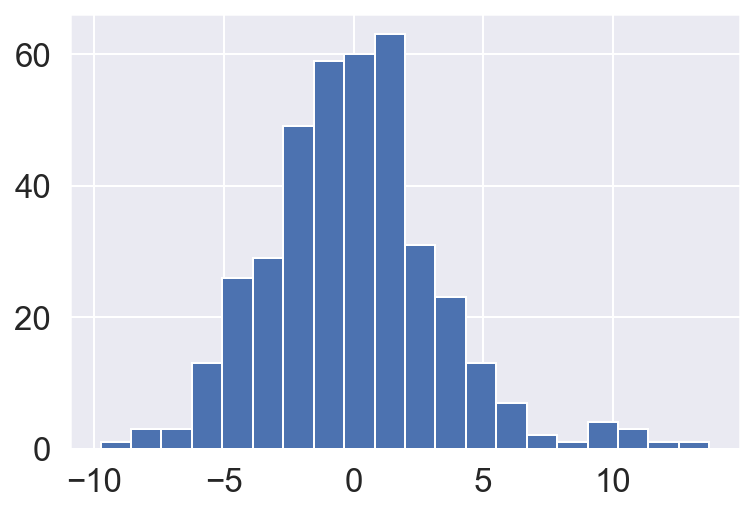

In [9]:
plt.hist(results.resid, bins=20)
plt.show()

### Use the formula language

Experiment with the formula language. Include interaction terms or nonlinear predictor dependence.

**Hint:** If you want to use patsy with categorical variables, you can dummify within the formula
with 

`formula = 'mpg~C(origin)'`

or

`formula = 'mpg~C(origin, Treatment(reference=2))'`

where the latter allows you to decide which category to use as the reference point rather than just dropping first.

In [10]:
y, X = patsy.dmatrices('mpg~horsepower+displacement+C(origin, Treatment(reference=2))', data=df, return_type='dataframe')

In [11]:
X.head()

,Intercept,"C(origin, Treatment(reference=2))[T.1]","C(origin, Treatment(reference=2))[T.3]",horsepower,displacement
0,1.0,1.0,0.0,130.0,307.0
1,1.0,1.0,0.0,165.0,350.0
2,1.0,1.0,0.0,150.0,318.0
3,1.0,1.0,0.0,150.0,304.0
4,1.0,1.0,0.0,140.0,302.0


In [12]:
formula = 'mpg~horsepower+np.power(horsepower, 2)+displacement+C(origin, Treatment(reference=2))'

In [13]:
model = smf.ols(formula=formula, data=df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     219.1
Date:                Sun, 02 Feb 2020   Prob (F-statistic):          2.34e-110
Time:                        16:42:09   Log-Likelihood:                -1097.6
No. Observations:                 392   AIC:                             2207.
Df Residuals:                     386   BIC:                             2231.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 51.3720      1.768     29.060      0.000      47.896      54.848
C(origin, Treatment(reference=2))[T.1]     0.2656      0.681      0.390      0.697      -1.074       1.605
C(origin, Treatment(reference=2))[T.3]     2.6190      0.664      3.945      0.000       1.314       3.924
horsepower                                -0.3477      0.032    -10.699      0.000      -0.412      -0.284
np.power(horsepower, 2)                    0.0011      0.000      9.160      0.000       0.001       0.001
displacement                              -0.0276      0.005     -5.196      0.000      -0.038      -0.017
==============================================================================
Omnibus:                       25.890   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.170
Skew:                           0.503   Prob(JB):                     1.40e-08
Kurtosis:                       4.097   Cond. No.                     1.38e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.38e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Fit with regularization

In [14]:
results_reg = model.fit_regularized()

In [15]:
results_reg.params

Intercept                                 37.789770
C(origin, Treatment(reference=2))[T.1]    -0.702418
C(origin, Treatment(reference=2))[T.3]     2.476792
horsepower                                -0.091643
np.power(horsepower, 2)                    0.000151
displacement                              -0.034797
dtype: float64

## Bonus: Construct an sklearn wrapper for statsmodels

Follow the example [here](http://nelsonauner.com/data/2018/05/21/wrap-statsmodels-in-sklearn.html) and use cross validation.

In [16]:
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [17]:
class SMWrapper(BaseEstimator, RegressorMixin):
    """ A universal sklearn-style wrapper for statsmodels regressors """
    def __init__(self, model_class, fit_intercept=True):
        self.model_class = model_class
        self.fit_intercept = fit_intercept
    def fit(self, X, y):
        if self.fit_intercept:
            X = sm.add_constant(X)
        self.model_ = self.model_class(y, X)
        self.results_ = self.model_.fit()
    def predict(self, X):
        if self.fit_intercept:
            X = sm.add_constant(X)
        return self.results_.predict(X)

In [18]:
print(cross_val_score(SMWrapper(sm.OLS), X, y, scoring='r2', cv=5))
print(cross_val_score(LinearRegression(), X, y, scoring='r2', cv=5))

[ 0.45322398  0.40699195  0.64159557  0.56535082 -0.6002242 ]
[ 0.45322398  0.40699195  0.64159557  0.56535082 -0.6002242 ]
